In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sladsnet.input_params import ERDInputParams, GeneralInputParams, SampleParams
from sladsnet.code.measurement_interface import TransmissionSimulationMeasurementInterface
from sladsnet.code.erd import SladsSklearnModel
from sladsnet.code.results import Result
from sladsnet.code.sampling import run_sampling
from sladsnet.code.base import Sample
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
base_path = Path.cwd().parent

In [4]:
train_path = base_path / 'ResultsAndData/TrainingData/93/'

In [5]:
c_value = 16

In [6]:
params_erd = ERDInputParams(c_value=c_value)
params_gen = GeneralInputParams()

In [8]:
erd_model = SladsSklearnModel(load_path=train_path / f'c_{c_value}/erd_model_relu.pkl')

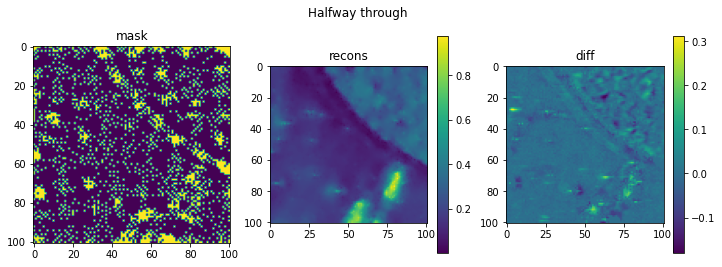

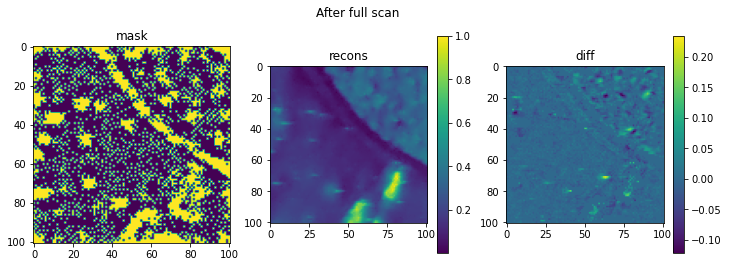

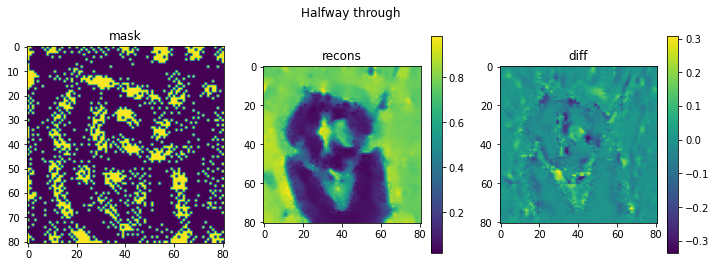

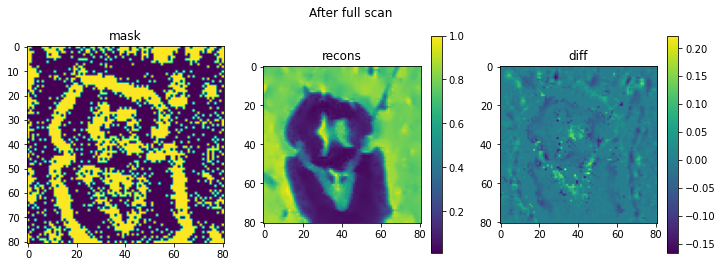

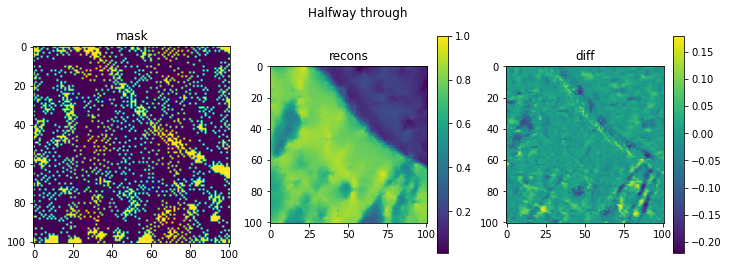

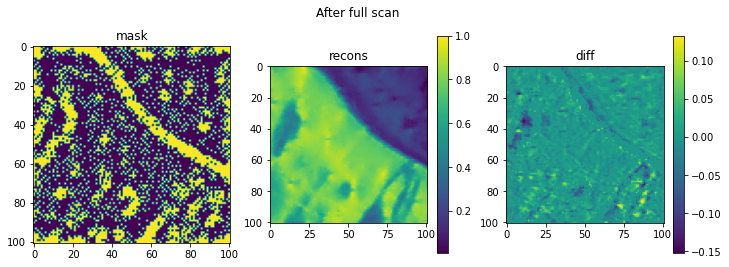

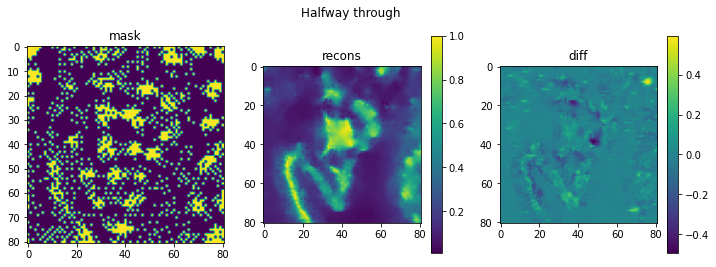

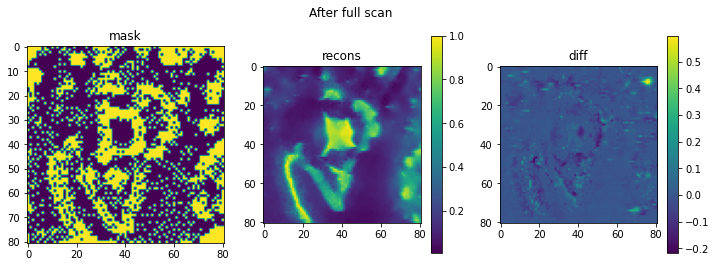

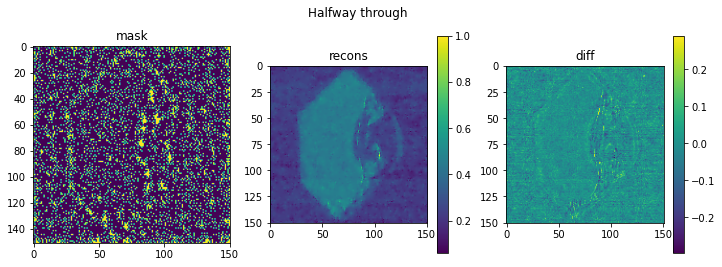

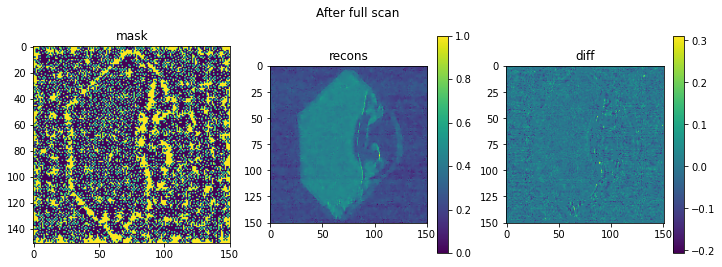

In [9]:
for img_num in [84, 91, 93, 95, 199]:
    img_path = base_path / f'ResultsAndData/TestingImages/TestingImageSet_{img_num}'
    tif_path = list(img_path.glob('*.tif'))[0]
    
    measurement_interface = TransmissionSimulationMeasurementInterface(image_path=tif_path)
    results = Result()
    sample_params = SampleParams(image_shape=measurement_interface.image.shape,
                             points_to_scan=1,
                             stop_ratio=0.4)
    sample = Sample(sample_params=sample_params,
                                  general_params=params_gen,
                                  erd_params=params_erd,
                                  measurement_interface=measurement_interface,
                                  erd_model=erd_model)
    run_sampling(sample, results=results, results_frequency=500, disable_progress_bar=False)
    
    save_path = base_path / f'ResultsAndData/SladsResults/cameraman_to_{img_num}'
    save_path.mkdir(exist_ok=True)
    results.save(save_path / 'results.pkl')
    
    num_results = results.size
    
    fig, axs = plt.subplots(1, 3, figsize=[12, 4])
    plt.subplot(1,3,1)
    plt.imshow(results.outputs.masks[num_results//2])
    plt.title('mask')
    plt.subplot(1,3,2)
    plt.imshow(results.outputs.recons[num_results//2])
    plt.colorbar()
    plt.title('recons')
    plt.subplot(1,3,3)
    plt.imshow(measurement_interface.image - results.outputs.recons[num_results//2])
    plt.colorbar()
    plt.title('diff')
    plt.suptitle('Halfway through')
    plt.show()
    
    fig, axs = plt.subplots(1, 3, figsize=[12, 4])
    plt.subplot(1,3,1)
    plt.imshow(results.outputs.masks[-1])
    plt.title('mask')
    plt.subplot(1,3,2)
    plt.imshow(results.outputs.recons[-1])
    plt.colorbar()
    plt.title('recons')
    plt.subplot(1,3,3)
    plt.imshow(measurement_interface.image - results.outputs.recons[-1])
    plt.colorbar()
    plt.title('diff')
    plt.suptitle('After full scan')
    plt.show()
    

    
    